In [2]:
# football analysis based on kaggle data from 2022 and 2023
# Tiago Russomanno

# libraries to import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



In [5]:
df = pd.read_csv('2022-2023 Football Player Stats.csv',sep=';', encoding='latin-1')
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


In [18]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


In [21]:
champs =df['Comp'].value_counts()
champs

Comp
Ligue 1           565
La Liga           550
Serie A           544
Premier League    540
Bundesliga        490
Name: count, dtype: int64

Text(0.5, 0, 'leagues')

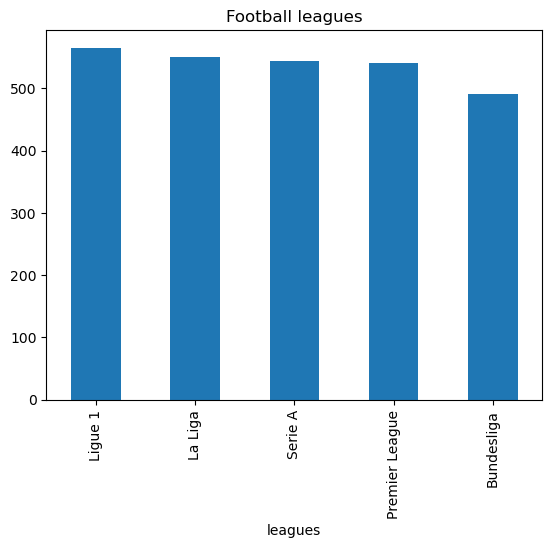

In [26]:
champs.plot(kind='bar')
plt.title( 'Football leagues')
plt.xlabel( 'leagues')

In [30]:
L1 = df.query('Comp == "Ligue 1"')
L1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.0,0.0,0.00,0.48,1.43,1.43,50.0


In [41]:
L1.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1263.440708,25.315044,1996.828319,12.042478,8.683186,777.688496,8.640885,1.093805,1.246743,0.450389,...,0.160779,1.730726,1.079717,0.014177,0.015416,0.003575,5.154761,1.290301,1.477487,44.288142
std,777.404489,4.584882,4.592305,7.346898,7.290124,622.263033,6.914073,2.180681,1.419961,0.833866,...,0.326785,2.261683,1.435267,0.059581,0.060468,0.027476,3.035165,1.530162,1.694722,27.017632
min,2.000000,16.000000,1983.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,593.000000,22.000000,1994.000000,5.000000,2.000000,180.000000,2.000000,0.000000,0.240000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.320000,0.480000,28.600000
50%,1251.000000,25.000000,1997.000000,13.000000,8.000000,681.000000,7.600000,0.000000,0.830000,0.170000,...,0.000000,0.850000,0.860000,0.000000,0.000000,0.000000,5.030000,0.860000,1.050000,47.400000
75%,1916.000000,29.000000,2000.000000,19.000000,16.000000,1342.000000,14.900000,1.000000,1.920000,0.670000,...,0.190000,2.500000,1.430000,0.000000,0.000000,0.000000,6.530000,1.700000,1.790000,60.000000
max,2671.000000,39.000000,2006.000000,23.000000,23.000000,2070.000000,23.000000,14.000000,10.000000,10.000000,...,3.330000,13.300000,20.000000,0.830000,0.910000,0.500000,30.000000,10.000000,15.000000,100.000000


In [39]:
top_scores_L1 = L1.sort_values(by = 'Goals', ascending=False)[['Player','Nation','Pos','Squad','Comp','Age','Goals','Shots','SoT','ShoDist','PasTotCmp%']]
top_scores_L1.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Goals,Shots,SoT,ShoDist,PasTotCmp%
252,Wissam Ben Yedder,FRA,FW,Monaco,Ligue 1,32,14,2.46,1.59,15.7,76.3
184,Folarin Balogun,ENG,FW,Reims,Ligue 1,21,14,3.33,1.58,15.2,65.3
1358,Alexandre Lacazette,FRA,FW,Lyon,Ligue 1,31,13,2.85,1.40,14.9,70.0
1609,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,24,13,4.42,2.21,16.2,79.9
1687,Terem Moffi,NGA,FW,Lorient,Ligue 1,23,12,2.14,1.17,13.6,74.0
605,Jonathan David,CAN,FW,Lille,Ligue 1,23,12,3.13,1.38,14.9,82.1
788,Breel Embolo,SUI,FW,Monaco,Ligue 1,25,12,1.99,0.99,11.0,68.6
1780,Neymar,BRA,MFFW,Paris S-G,Ligue 1,31,12,2.05,1.02,17.0,80.1
669,Habib Diallo,SEN,FW,Strasbourg,Ligue 1,27,10,2.22,0.99,13.2,68.3
1650,Lionel Messi,ARG,MFFW,Paris S-G,Ligue 1,35,10,4.57,1.94,17.8,80.1


Text(0, 0.5, 'total numbers per nation')

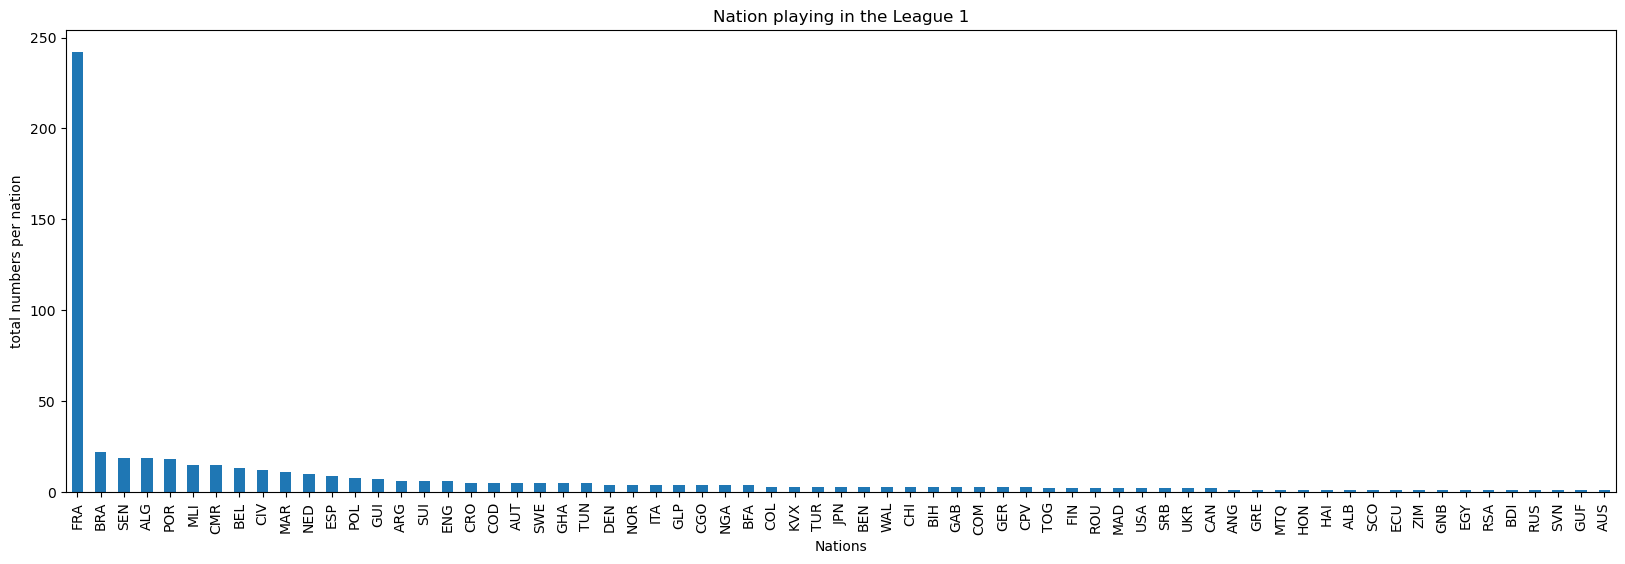

In [50]:
nations_l1 =top_scores_L1['Nation'].value_counts()
plt.subplots(figsize=(20, 6))
nations_l1.plot(kind='bar')
plt.title( 'Nation playing in the League 1')
plt.xlabel( 'Nations')
plt.ylabel( 'total numbers per nation')

## need to improve the next steps 

<AxesSubplot:>

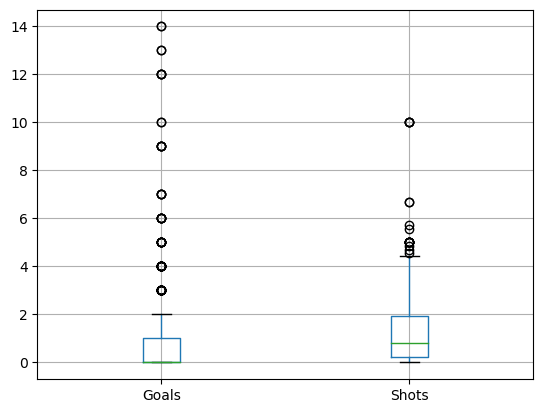

In [48]:
top_scores_L1.boxplot(['Goals', 'Shots'])